<a href="https://colab.research.google.com/github/kkipngenokoech/Material-Science/blob/main/fall/%5Bcrystal%5DRDF_PCF_updated_crystalline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/kkipngenokoech/Material-Science/refs/heads/main/materials/Si-amor2.xyz
!wget https://raw.githubusercontent.com/kkipngenokoech/Material-Science/refs/heads/main/materials/Si-crys.xyz

--2025-09-16 13:36:26--  https://raw.githubusercontent.com/kkipngenokoech/Material-Science/refs/heads/main/materials/Si-amor2.xyz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27841 (27K) [text/plain]
Saving to: ‘Si-amor2.xyz.1’

Si-amor2.xyz.1      100%[===================>]  27.19K  --.-KB/s    in 0.002s  

2025-09-16 13:36:26 (17.1 MB/s) - ‘Si-amor2.xyz.1’ saved [27841/27841]

--2025-09-16 13:36:26--  https://raw.githubusercontent.com/kkipngenokoech/Material-Science/refs/heads/main/materials/Si-crys.xyz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting r

In [ ]:
"""
Load the data
"""
# amorphous silicon (coord. in angstroms)
path = 'Si-amor2.xyz'

data_text = np.genfromtxt(fname=path, skip_header=2, dtype='unicode')

[n, m] = data_text.shape

In [ ]:
from ase import Atoms, Atom
from ase.io import read
from ase.visualize import view

atoms = read('Si-amor2.xyz')
atoms.center()

view(atoms, viewer='x3d')

In [ ]:
"""
Set input parameters
"""
dr = 0.01

#[dx, dy, dz] = [50, 50, 50]    # for the carbon file
[dx, dy, dz] = [30, 30, 30]    # for the silicon file

In [ ]:
"""
Calculate all the interadomic distances.
"""
vol = dx * dy * dz    # volume of data box
density = n/vol       # number of atoms/Angstrom^3

data = np.float64(data_text[:,1:4])

# Find the atom-to-atom vectors, reshpae into an n**2 by 3 array
vects = np.array([data - i for i in data])

# Find the magnitude of the vectors
dist = np.linalg.norm(vects, axis=2)

In [ ]:
"""
Count the atoms in each shell
"""
# Use // (floor division operator) to get the shell index for each length
shell_inds = (dist // dr).astype(int)

# Count the number in each bin.
# (need to flatten to 1D array first, see bincount documentation.)
shell_inds = shell_inds.flatten()
shell_counts = np.bincount(shell_inds)

# Zero out the first element that counted all the self-self distances
shell_counts[0] = 0

In [ ]:
"""
Calculate RDF and PCF.
"""
# Make array of the shell's radii correspondiong to each bin
r = np.arange(0, np.max(dist), dr)

# Calculate each shell's volume
v_sh = 4 * np.pi * ((r)**2) * dr

# Normailze by the number of atoms in a shell by the volume of shell and total number of atoms
# to get the ensemble average of the local density
rho_r = shell_counts / v_sh / n

# Calculate PCF
pcf = rho_r / (density)

# Calulate RDF
rdf = shell_counts / n

/tmp/ipython-input-3190493117.py:12: RuntimeWarning: invalid value encountered in divide
  rho_r = shell_counts / v_sh / n


Text(0, 0.5, 'g(r)')

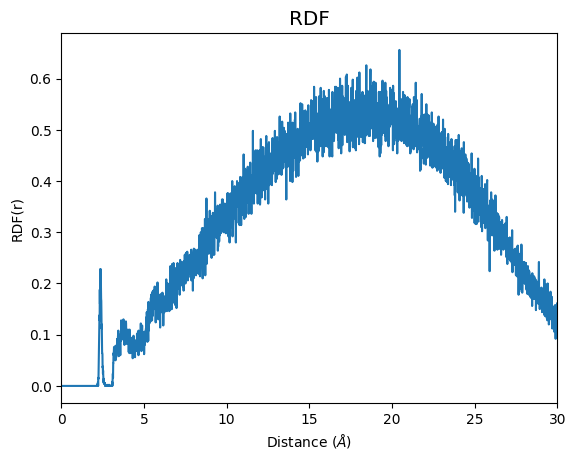

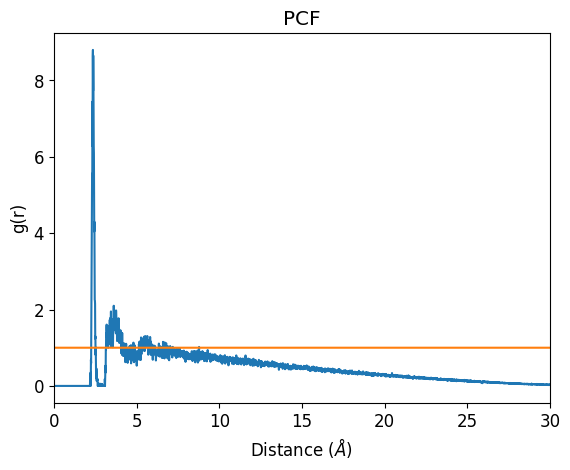

In [ ]:
"""
Plot and label
"""
plt.figure(0)
plt.plot(r, rdf)
plt.xlim(0, 30)
plt.rc('font', size=12)
plt.title('RDF')
plt.xlabel(r'Distance ($\AA$)')
plt.ylabel('RDF(r)')

plt.figure(1)
plt.plot(r, pcf)
plt.plot(r, np.ones(len(r)))
plt.xlim(0, 30)
plt.rc('font', size=12)
plt.title('PCF')
plt.xlabel(r'Distance ($\AA$)')
plt.ylabel('g(r)')

In [ ]:
"""
Integrate the RDF to get number of near neighbors:
"""
# Specify integration limits in Angstroms:
dcutoff = np.array([0, 2.7])

# Convert integration limits to array indices
ind_cutoff = (dcutoff // dr).astype(int)

nn = np.sum(rdf[ind_cutoff[0]:ind_cutoff[1]]) * dr
print(nn)

0.03496
